# Supervised Machine Learning Algorithms 

## Import library and modules 

In [2]:
import mglearn 
import matplotlib.pyplot as plt
import numpy as np
import sklearn 

## Dataset : ```mglearn.datasets.make-forge```

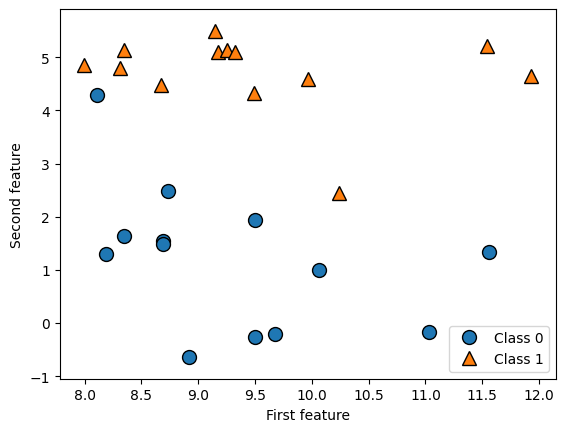

X.shape: (26, 2)


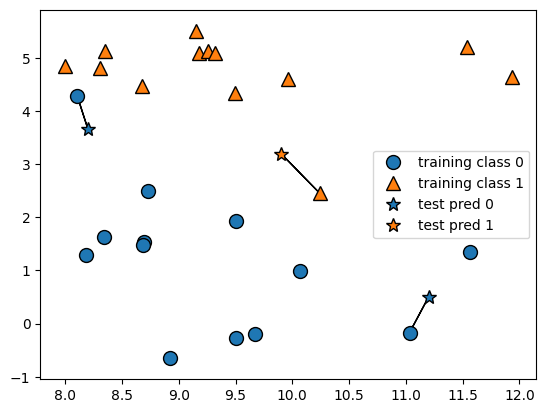

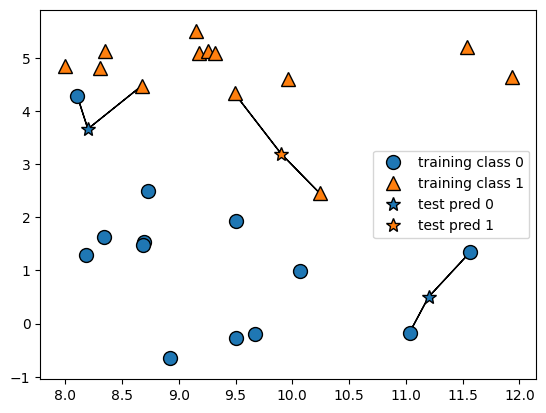

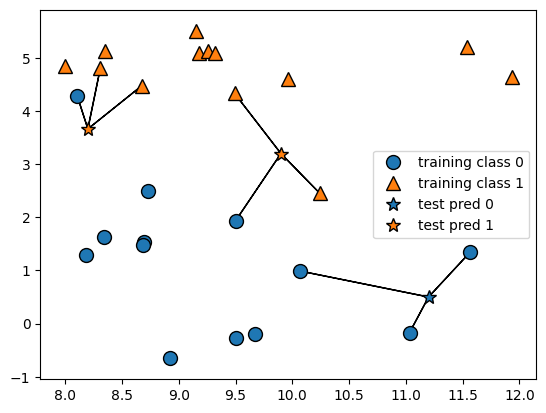

Test set accuracy: 0.71 with 1 neighbors
Test set accuracy: 0.71 with 2 neighbors
Test set accuracy: 0.86 with 3 neighbors
Test set accuracy: 0.86 with 4 neighbors
Test set accuracy: 0.86 with 5 neighbors
Test set accuracy: 0.86 with 6 neighbors
Test set accuracy: 0.86 with 7 neighbors
Test set accuracy: 0.86 with 8 neighbors
Test set accuracy: 0.86 with 9 neighbors


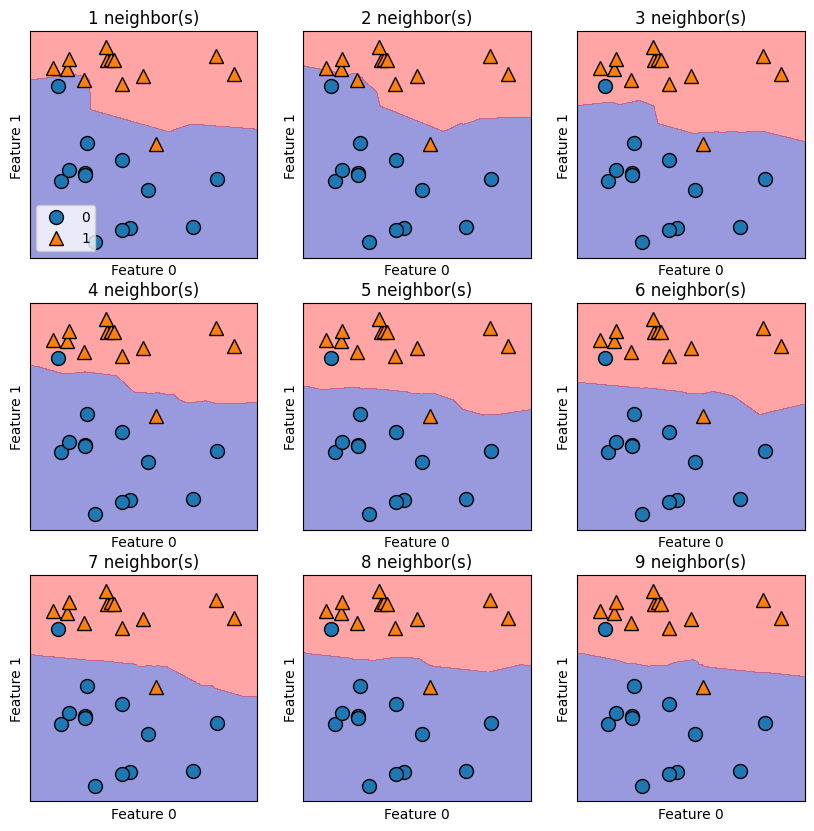

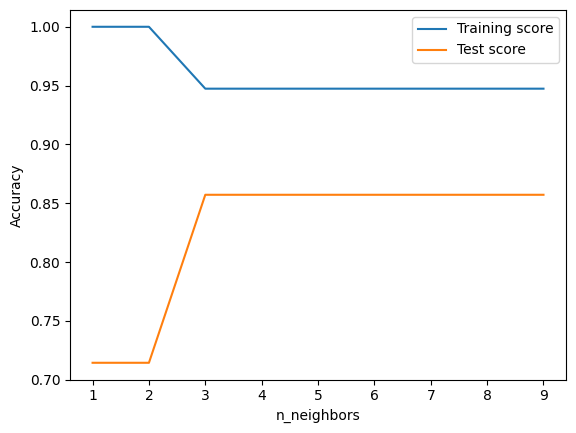

In [14]:

X,y = mglearn.datasets.make_forge()
scores_train = []
scores_test = []
# View the dataset 
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
print("X.shape: {}".format(X.shape))

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_classification(n_neighbors=2)
plt.show()
mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=100, test_size=0.25)
fig,axes = plt.subplots(3,3,figsize=(10,10))
for ax, n_neighbors in zip(axes.ravel(), [1,2,3,4,5,6,7,8,9]):
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    scores_train.append(clf.score(X_train,y_train))
    scores_test.append(clf.score(X_test,y_test))
    print(f"Test set accuracy: {clf.score(X_test,y_test):.2f} with {n_neighbors} neighbors")
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0,0].legend(loc=3)
plt.show()

# Plotting scores 
plt.plot(range(1,10),scores_train,label="Training score")
plt.plot(range(1,10),scores_test,label="Test score")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

## Dataset : ```mglearn.make_wave```

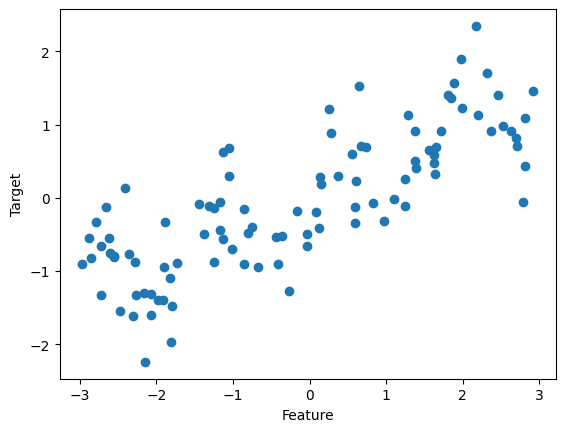

X.shape: (100, 1)
Test set R^2: 0.46 with 1 neighbors


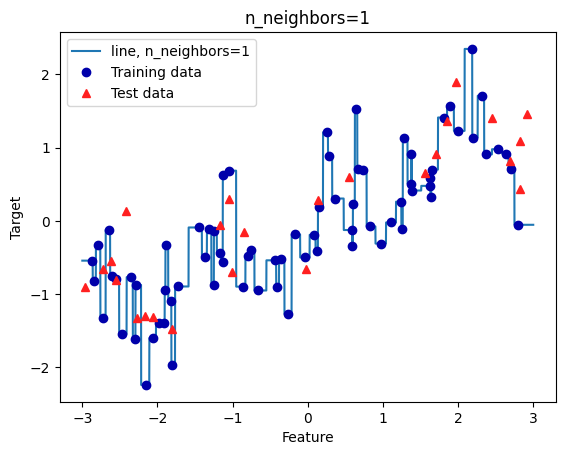

Test set R^2: 0.66 with 2 neighbors


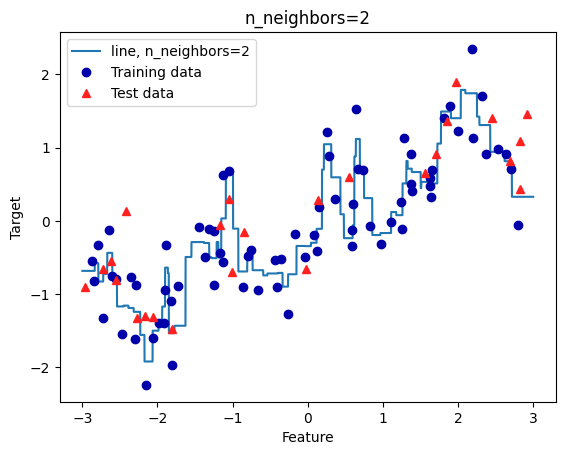

Test set R^2: 0.74 with 3 neighbors


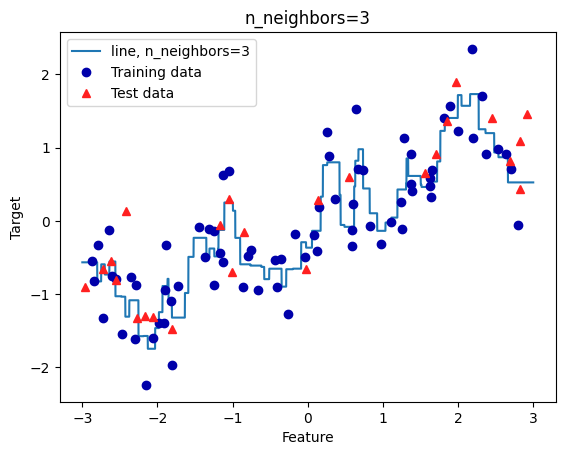

Test set R^2: 0.81 with 4 neighbors


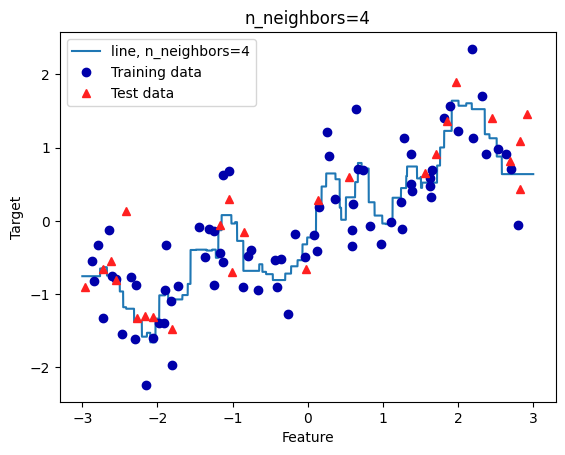

Test set R^2: 0.82 with 5 neighbors


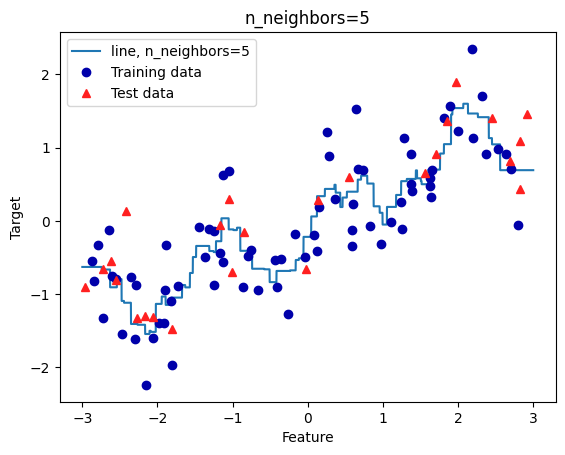

Test set R^2: 0.86 with 6 neighbors


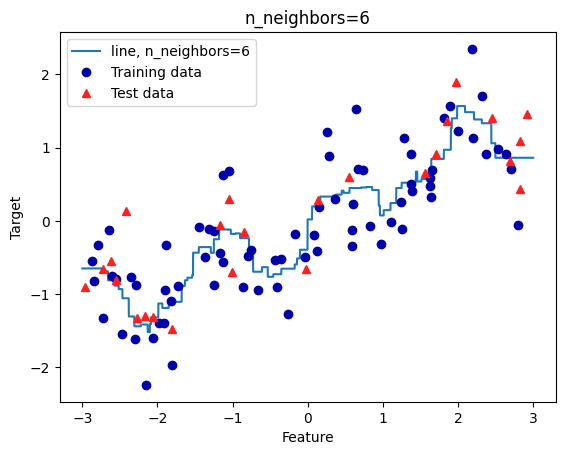

Test set R^2: 0.85 with 7 neighbors


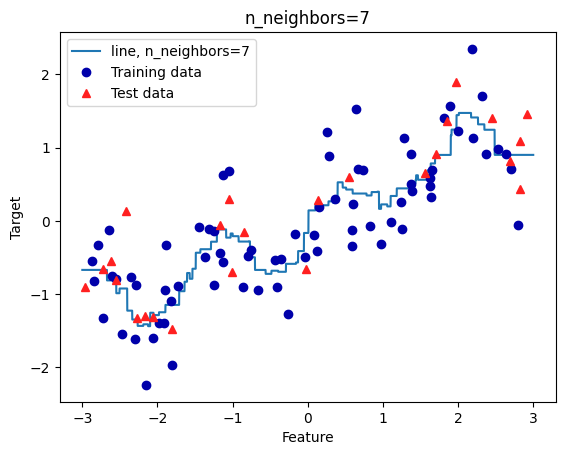

Test set R^2: 0.83 with 8 neighbors


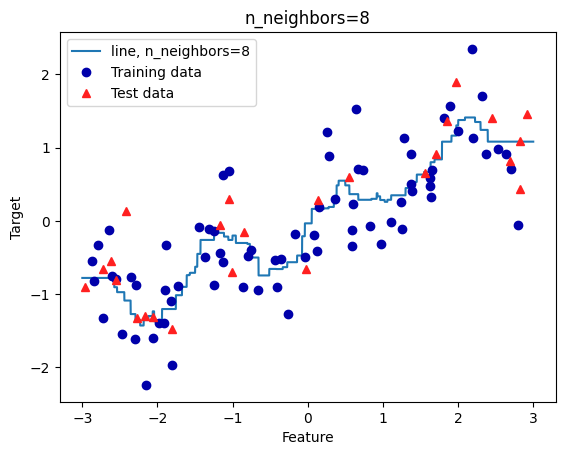

Test set R^2: 0.83 with 9 neighbors


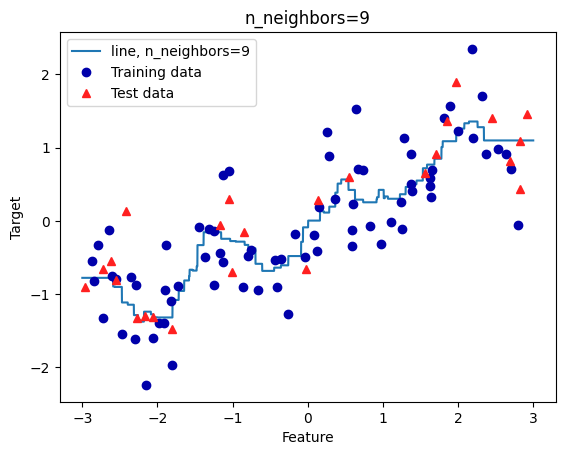

Test set R^2: 0.82 with 10 neighbors


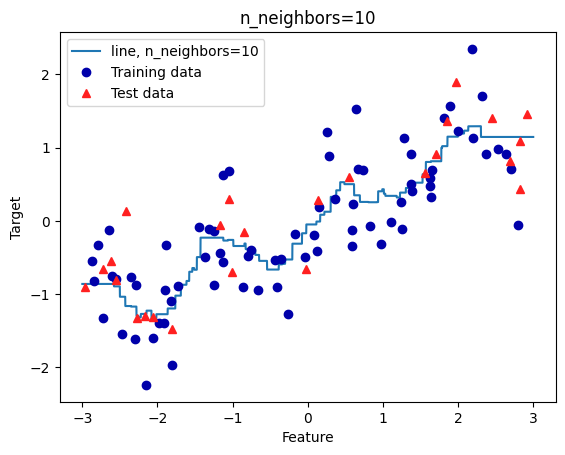

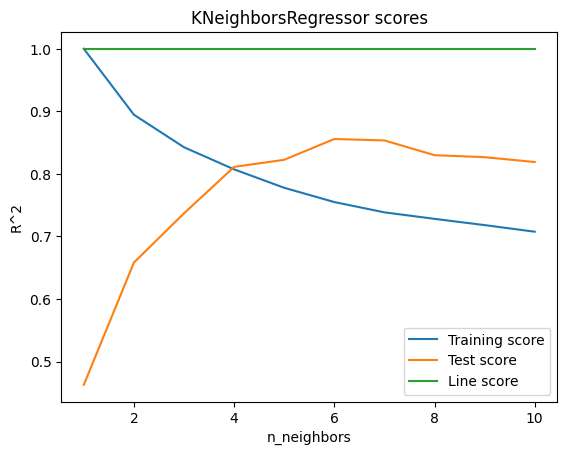

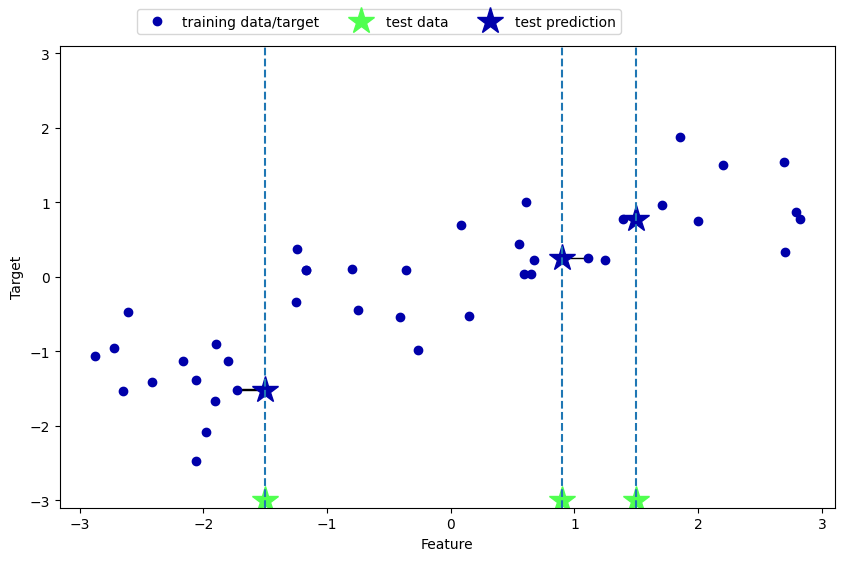

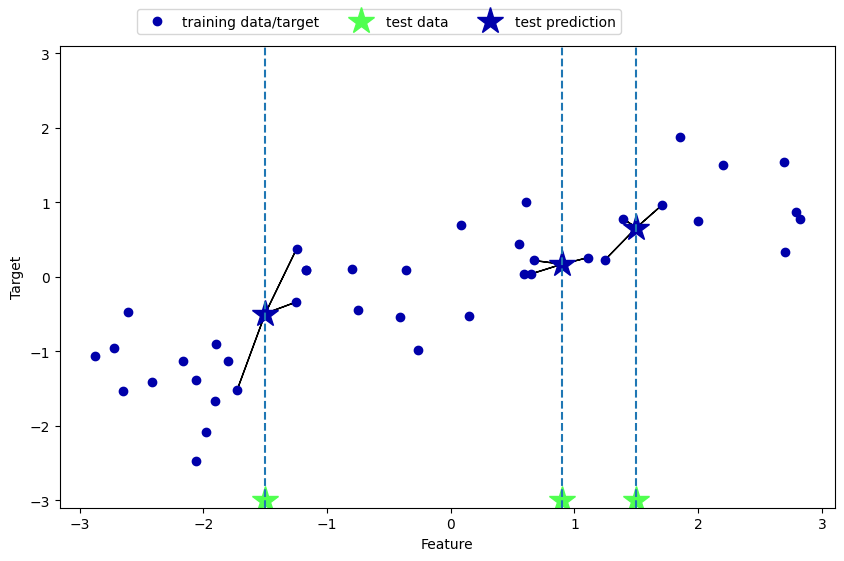

In [18]:
X,y = mglearn.datasets.make_wave()
plt.plot(X,y,'o')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()
scores_train = []
scores_test = []
print("X.shape: {}".format(X.shape))
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,random_state=100, test_size=0.25)
line = np.linspace(-3,3,10000).reshape(-1,1)
scores_line = []
for n_neighbors in np.arange(1,11):
    reg = sklearn.neighbors.KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    
    scores_line.append(reg.score(line,reg.predict(line)))
    scores_train.append(reg.score(X_train,y_train))
    scores_test.append(reg.score(X_test,y_test))
    print(f"Test set R^2: {reg.score(X_test,y_test):.2f} with {n_neighbors} neighbors")
    plt.plot(line,reg.predict(line),label=f"line, n_neighbors={n_neighbors}")
    plt.plot(X_train,y_train,"o",c=mglearn.cm2(0),label="Training data")
    plt.plot(X_test,y_test,"^",c=mglearn.cm2(1),label="Test data")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title(f"n_neighbors={n_neighbors}")
    plt.legend()
    plt.show()
plt.plot(range(1,11),scores_train,label="Training score")
plt.plot(range(1,11),scores_test,label="Test score")
plt.plot(range(1,11),scores_line,label="Line score")
plt.title("KNeighborsRegressor scores")
plt.ylabel("R^2")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()    
mglearn.plots.plot_knn_regression(n_neighbors=1)
plt.show()
mglearn.plots.plot_knn_regression(n_neighbors=3)
plt.show()


## Dataset : ```sklearn.datasets.load_breast_cancer```

In [19]:


cancer = sklearn.datasets.load_breast_cancer()

class_counts = {name: count for name, count in zip(cancer.target_names, np.bincount(cancer.target))}

print(f"""
    Breast Cancer Dataset Info
Dataset keys: {cancer.keys()}

Data shape: {cancer.data.shape},
Target shape: {cancer.target.shape},
Target names : {cancer.target_names}
Feature names: {', '.join(cancer.feature_names)}
filename: {cancer.filename}

Number of classes: {len(np.unique(cancer.target))}
Classes: {cancer.target_names}
Sample counts per class: 
{''.join(f'  {name}: {count}\n' for name, count in class_counts.items())}


Description: {cancer.DESCR}
""")


    Breast Cancer Dataset Info
Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Data shape: (569, 30),
Target shape: (569,),
Target names : ['malignant' 'benign']
Feature names: mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, worst fractal dimension
filename: breast_cancer.csv

Number of classes: 2
Classes: ['malignant' 'benign']
Sample counts per class: 
  malignant: 212
  benign: 357



Description: .. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
-----

## Datasets : ```sklearn.datasets.fetch_california_housing()```

In [26]:
california = sklearn.datasets.fetch_california_housing()
print(f"""
    California Housing Dataset Info
Dataset keys: {california.keys()}
Data shape: {california.data.shape},
Target shape: {california.target.shape},
Feature names: {', '.join(california.feature_names)}

Description: {california.DESCR}
""")


    California Housing Dataset Info
Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
Data shape: (20640, 8),
Target shape: (20640,),
Feature names: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude

Description: .. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from